# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df_train = pd.read_csv("train.txt", delimiter=';', header=None, names=['comment','category'])
df_test  = pd.read_csv("test.txt", delimiter=';', header=None, names=['comment','category'])
df_val   = pd.read_csv("val.txt", delimiter=';', header=None, names=['comment','category'])

In [3]:
tweet_df = pd.concat([df_train,df_test,df_val], axis = 0)

# Visualising the class distribution in dataset.

<AxesSubplot:xlabel='category', ylabel='count'>

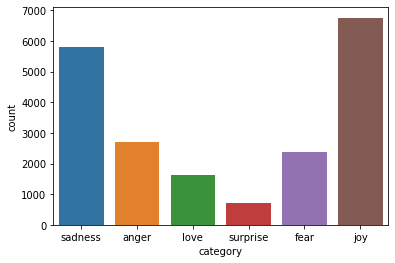

In [4]:
sns.countplot(x="category",data=tweet_df)

# Preprocessing the dataset 

In [5]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['comment'] = tweet_df['comment'].apply(lambda x: remove_punct(x))

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_df["text_wo_stop"] = tweet_df["comment"].apply(lambda text: remove_stopwords(text))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
tweet_df["text_stemmed"] = tweet_df["text_wo_stop"].apply(lambda text: stem_words(text))

from collections import Counter
cnt = Counter()
for text in tweet_df["text_stemmed"].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_df["text__stopfreq"] = tweet_df["text_stemmed"].apply(lambda text: remove_freqwords(text))

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_df["text_lemmatized"] = tweet_df["text__stopfreq"].apply(lambda text: lemmatize_words(text))

tweet_df=tweet_df.drop(["text_stemmed","text__stopfreq"],axis=1)

from sklearn.preprocessing import LabelEncoder
tweet_df['encoded_category'] = LabelEncoder().fit_transform(tweet_df['category'])
tweet_df[["category", "encoded_category"]] 

def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

tweet_df=tweet_df.drop(["category","text_wo_stop"],axis=1)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AGNETTA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
tweet_df.head()

,comment,text_lemmatized,encoded_category
0,i didnt feel humiliated,didnt humili,4
1,i can go from feeling so hopeless to so damned...,hopeless damn hope around someon care awak,4
2,im grabbing a minute to post i feel greedy wrong,grab minut post greedi wrong,0
3,i am ever feeling nostalgic about the fireplac...,ever nostalg fireplac still properti,3
4,i am feeling grouchy,grouchi,0


# Importing all the Machine learning libraries 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [8]:
def batch_selector(dataset,samples_no):
    training_batch=dataset.iloc[:samples_no]
    unlabelled_batch=dataset.iloc[samples_no:]
    return training_batch, unlabelled_batch

In [9]:
encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}

In [10]:



df_surprise=tweet_df[tweet_df['encoded_category']==5]
df_fear    =tweet_df[tweet_df['encoded_category']==1]
df_joy     =tweet_df[tweet_df['encoded_category']==2]
df_love    =tweet_df[tweet_df['encoded_category']==3]
df_anger   =tweet_df[tweet_df['encoded_category']==0]
df_sadness =tweet_df[tweet_df['encoded_category']==4]

print(f'sadness:{df_sadness.shape}')
print(f'anger:{df_anger.shape}')
print(f'love:{df_love.shape}')
print(f'joy:{df_joy.shape}')
print(f'fear:{df_fear.shape}')
print(f'surprise:{df_surprise.shape}')

sadness:(5797, 3)
anger:(2709, 3)
love:(1641, 3)
joy:(6761, 3)
fear:(2373, 3)
surprise:(719, 3)


In [11]:
No_samples=100
surprise_train,surprise_test=batch_selector(df_surprise,No_samples)
fear_train,fear_test=batch_selector(df_fear,No_samples)
joy_train,joy_test=batch_selector(df_joy,No_samples)
love_train,love_test=batch_selector(df_love,No_samples)
anger_train,anger_test=batch_selector(df_anger,No_samples)
sadness_train,sadness_test=batch_selector(df_sadness,No_samples)

test250 = pd.concat([surprise_test,fear_test,joy_test,love_test,anger_test,sadness_test], axis = 0)
train250= pd.concat([surprise_train,fear_train,joy_train,love_train,anger_train,sadness_train], axis = 0)


pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(train250.text_lemmatized, train250.encoded_category)
prediction = model.predict(test250.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(test250.encoded_category, prediction)*100,2)))
print(confusion_matrix(test250.encoded_category, prediction))
print(classification_report(test250.encoded_category, prediction))

MODEL - LINEAR SVC
accuracy score: 54.3%
[[1653  173  198  207  301   77]
 [ 168 1305  210  143  177  270]
 [ 499  524 3204 1180  767  487]
 [ 105   60  136 1108   86   46]
 [ 607  614  841  637 2712  286]
 [  10   10   18   16   12  553]]
              precision    recall  f1-score   support

           0       0.54      0.63      0.59      2609
           1       0.49      0.57      0.53      2273
           2       0.70      0.48      0.57      6661
           3       0.34      0.72      0.46      1541
           4       0.67      0.48      0.56      5697
           5       0.32      0.89      0.47       619

    accuracy                           0.54     19400
   macro avg       0.51      0.63      0.53     19400
weighted avg       0.60      0.54      0.55     19400



In [12]:
#model.predict_proba(test250.text_lemmatized)
from sklearn.calibration import CalibratedClassifierCV
linear_svc = LinearSVC()     #The base estimator

# This is the calibrated classifier which can give probabilistic classifier
calibrated_svc = CalibratedClassifierCV(linear_svc,
                                        method='sigmoid',  #sigmoid will use Platt's scaling. Refer to documentation for other methods.
                                        cv=3) 
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', calibrated_svc)])
model2 = pipe2.fit(train250.text_lemmatized, train250.encoded_category)
prediction = model2.predict_proba(test250.text_lemmatized)


In [13]:
prediction.shape

(19400, 6)

In [14]:
def num_sim(n1, n2):
  """ calculates a similarity score between 2 numbers """
  return 1 - abs(n1 - n2) / (n1 + n2)

def maxConflictFinder(array):
    a_list = list(array)
    are= list(array)
    max_value = max(a_list)
    max_index = a_list.index(max_value)
    maxele=a_list.pop(max_index)
    for i in range(len(a_list)):
        intdiff=num_sim(a_list[i],maxele)
        if((intdiff>0.90)):
            return are.index(a_list[i]),are.index(maxele)
        else:
            return None
        
        


In [15]:
test250


,comment,text_lemmatized,encoded_category
2419,i sat silent and open mouthed as he rattled of...,sat silent open mouth rattl reason love specia...,5
2438,i feel sort of dazed and cross eyed,sort daze cross eye,5
2459,i remember is the feeling of falling and miyav...,rememb fall miyavi shock face,5
2506,i will adjust to it but for now it feels so st...,adjust strang,5
2517,i watch her silently feeling dazed from my mem...,watch silent daze memori loss,5
...,...,...,...
1975,i am feeling so helpless ma i am being unable ...,helpless unabl fight ill unabl take pain helpl...,4
1979,i guess it s all about trying to internalize t...,guess tri intern seren prayer without also wal...,4
1984,i have i feel pathetic for lying if i say no,pathet lie say,4
1991,i cant help but feel sentimental about the fac...,cant help sentiment fact drawn,4


In [16]:
def indexGenerator(df):
    n,_=df.shape
    index=np.arange(0,n)
    df['index']=index
    df=df.set_index('index')
    return df

In [17]:
def dataTx(n,df_test1,df_train1):
    df_train1=df_train1.append(df_test1[n:n+1])
    df_test1=df_test1.drop(n)
    return df_test1,df_train1
df1,df2=dataTx(3,test250,train250)

# active learning creation

In [18]:
df_test,df_train=test250,train250

In [19]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', calibrated_svc)])

model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
all_prediction = model2.predict_proba(df_test.text_lemmatized)


ine,_=all_prediction.shape

lis=[]
lis3=[]
for i in range(ine):
    if (maxConflictFinder(all_prediction[i]) != None):
        lis.append(maxConflictFinder(all_prediction[i]))
        lis3.append(i)
        
print(len(lis3))

print("test shape",df_test.shape,"train shape",df_train.shape) 

df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)

for i in lis3:
    df_test,df_train=dataTx(i,df_test,df_train)
    
df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)

print("new test shape",df_test.shape,"new train shape",df_train.shape) 


pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
prediction = model.predict(df_test.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
print(confusion_matrix(df_test.encoded_category, prediction))
print(classification_report(df_test.encoded_category, prediction))

836
test shape (19400, 3) train shape (600, 3)
new test shape (18564, 3) new train shape (1389, 3)
MODEL - LINEAR SVC
accuracy score: 74.98%
[[1893   54  173   39  253   11]
 [ 116 1385  226   49  225  168]
 [ 253  145 4891  415  585  116]
 [  66   41  298  963  135    6]
 [ 274  203  511  103 4291   59]
 [  12   25   36   10   37  497]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2423
           1       0.75      0.64      0.69      2169
           2       0.80      0.76      0.78      6405
           3       0.61      0.64      0.62      1509
           4       0.78      0.79      0.78      5441
           5       0.58      0.81      0.67       617

    accuracy                           0.75     18564
   macro avg       0.71      0.74      0.72     18564
weighted avg       0.75      0.75      0.75     18564



In [20]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
prediction = model.predict(df_test.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
print(confusion_matrix(df_test.encoded_category, prediction))
print(classification_report(df_test.encoded_category, prediction))

MODEL - LINEAR SVC
accuracy score: 74.98%
[[1893   54  173   39  253   11]
 [ 116 1385  226   49  225  168]
 [ 253  145 4891  415  585  116]
 [  66   41  298  963  135    6]
 [ 274  203  511  103 4291   59]
 [  12   25   36   10   37  497]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2423
           1       0.75      0.64      0.69      2169
           2       0.80      0.76      0.78      6405
           3       0.61      0.64      0.62      1509
           4       0.78      0.79      0.78      5441
           5       0.58      0.81      0.67       617

    accuracy                           0.75     18564
   macro avg       0.71      0.74      0.72     18564
weighted avg       0.75      0.75      0.75     18564



In [21]:
df_surprise_al=df_train[df_train['encoded_category']==5]
df_fear_al    =df_train[df_train['encoded_category']==1]
df_joy_al     =df_train[df_train['encoded_category']==2]
df_love_al    =df_train[df_train['encoded_category']==3]
df_anger_al   =df_train[df_train['encoded_category']==0]
df_sadness_al =df_train[df_train['encoded_category']==4]

print(f'sadness:{df_sadness_al.shape}')
print(f'anger:{df_anger_al.shape}')
print(f'love:{df_love_al.shape}')
print(f'joy:{df_joy_al.shape}')
print(f'fear:{df_fear_al.shape}')
print(f'surprise:{df_surprise_al.shape}')

sadness:(346, 3)
anger:(257, 3)
love:(140, 3)
joy:(346, 3)
fear:(198, 3)
surprise:(102, 3)


In [22]:
df_test,df_train=test250,train250
no_conflict_elements=[]
accuracy_list=[]

In [23]:
for k in range(100):
    print("###############","ITERATION NO",k+1,"###############################")
    pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', calibrated_svc)])
    model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
    all_prediction = model2.predict_proba(df_test.text_lemmatized)
    ine,_=all_prediction.shape
    lis=[]
    lis3=[]
    for i in range(ine):
        if (maxConflictFinder(all_prediction[i]) != None):
            lis.append(maxConflictFinder(all_prediction[i]))
            lis3.append(i)
    print(len(lis3))
    no_conflict_elements.append(len(lis3))
    print("test shape",df_test.shape,"train shape",df_train.shape) 
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    for i in lis3:
        df_test,df_train=dataTx(i,df_test,df_train)
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    print("new test shape",df_test.shape,"new train shape",df_train.shape)
    print("    ")
    df_surprise_al=df_train[df_train['encoded_category']==5]
    df_fear_al    =df_train[df_train['encoded_category']==1]
    df_joy_al     =df_train[df_train['encoded_category']==2]
    df_love_al    =df_train[df_train['encoded_category']==3]
    df_anger_al   =df_train[df_train['encoded_category']==0]
    df_sadness_al =df_train[df_train['encoded_category']==4]
    print(f'sadness:{df_sadness_al.shape}')
    print(f'anger:{df_anger_al.shape}')
    print(f'love:{df_love_al.shape}')
    print(f'joy:{df_joy_al.shape}')
    print(f'fear:{df_fear_al.shape}')
    print(f'surprise:{df_surprise_al.shape}')
    pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', LinearSVC())])
    model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
    prediction = model.predict(df_test.text_lemmatized)
    print("    ")
    print("MODEL - LINEAR SVC")
    print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    accuracy_list.append(format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    print(confusion_matrix(df_test.encoded_category, prediction))
    print(classification_report(df_test.encoded_category, prediction))
    if(len(lis3)==0):
        break

############### ITERATION NO 1 ###############################
836
test shape (19400, 4) train shape (600, 4)
new test shape (18564, 3) new train shape (1389, 3)
    
sadness:(346, 3)
anger:(257, 3)
love:(140, 3)
joy:(346, 3)
fear:(198, 3)
surprise:(102, 3)
    
MODEL - LINEAR SVC
accuracy score: 74.98%
[[1893   54  173   39  253   11]
 [ 116 1385  226   49  225  168]
 [ 253  145 4891  415  585  116]
 [  66   41  298  963  135    6]
 [ 274  203  511  103 4291   59]
 [  12   25   36   10   37  497]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2423
           1       0.75      0.64      0.69      2169
           2       0.80      0.76      0.78      6405
           3       0.61      0.64      0.62      1509
           4       0.78      0.79      0.78      5441
           5       0.58      0.81      0.67       617

    accuracy                           0.75     18564
   macro avg       0.71      0.74      0.72     18564
weighted

# Plotting the increasing in accuracy and reducing the conflecting elements

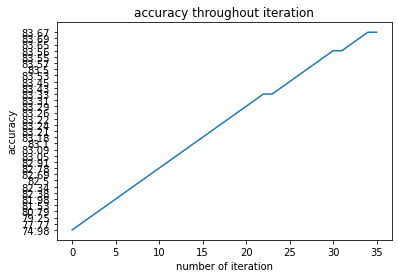

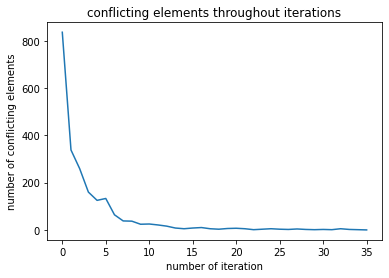

In [42]:
import matplotlib.pyplot as plt
# x axis values
x_axis=np.arange(0,len(no_conflict_elements))
# corresponding y axis values
y = accuracy_list
# plotting the points
plt.plot(x_axis, y)
# naming the x axis
plt.xlabel('number of iteration')
# naming the y axis
plt.ylabel('accuracy')
# giving a title to my graph
plt.title('accuracy throughout iteration')
# function to show the plot
plt.show()
y = no_conflict_elements
# plotting the points
plt.plot(x_axis, y)
# naming the x axis
plt.xlabel('number of iteration')
# naming the y axis
plt.ylabel('number of conflicting elements')
# giving a title to my graph
plt.title('conflicting elements throughout iterations')
# function to show the plot
plt.show()

In [36]:
tweet_df.shape
x_train,x_test,y_train,y_test = train_test_split(tweet_df.text_lemmatized,tweet_df.encoded_category,test_size = 0.20 , random_state = 0,stratify=tweet_df.encoded_category)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("number of training samples :",)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

number of training samples :
MODEL - LINEAR SVC
accuracy score: 86.15%
[[ 458   13   24    4   41    2]
 [  24  379   28    7   28    9]
 [  15   10 1241   38   40    8]
 [   6    5   77  215   23    2]
 [  25   15   45    8 1063    3]
 [   2   17   21    2   12   90]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       542
           1       0.86      0.80      0.83       475
           2       0.86      0.92      0.89      1352
           3       0.78      0.66      0.71       328
           4       0.88      0.92      0.90      1159
           5       0.79      0.62      0.70       144

    accuracy                           0.86      4000
   macro avg       0.84      0.79      0.81      4000
weighted avg       0.86      0.86      0.86      4000



In [ ]:
plt.plot(accuracy_list,'-o')
plt.plot(x_axis,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
 
plt.show()

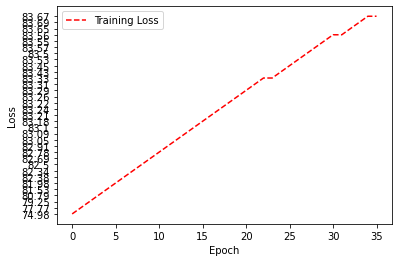

In [40]:
plt.plot(x_axis, accuracy_list, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [18]:
lis7=[]
def dataTx_trial(txlist,df_test1,df_train1):
    for n in txlist:
        df_train1=df_train1.append(indexGenerator((df_test1.iloc[n].to_frame()).transpose()))
    for k in txlist:
        df_test1=df_test1.drop(k)
    return df_test1,df_train1

df_test,df_train=test250,train250
df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)
df_test.shape,df_train.shape

((19400, 3), (600, 3))

In [35]:
#indexGenerator((df_test.iloc[0].to_frame()).transpose())

In [36]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', calibrated_svc)])
model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
all_prediction = model2.predict_proba(df_test.text_lemmatized)
ine,_=all_prediction.shape
lis=[]
lis3=[]
for i in range(ine):
    if (maxConflictFinder(all_prediction[i]) != None):
        lis.append(maxConflictFinder(all_prediction[i]))
        lis3.append(i)
print(len(lis3))

836


In [37]:
df_test.shape,df_train.shape

((19400, 3), (600, 3))

In [38]:
# for n in lis3:
#     df_train=df_train.append(indexGenerator((df_test.iloc[n].to_frame()).transpose()))

In [39]:
df_test,df_train=dataTx_trial(lis3,df_test,df_train)

In [42]:
df_test.shape,df_train.shape

((18564, 3), (1436, 3))

In [20]:
df_test,df_train=test250,train250
df_test=indexGenerator(df_test)
df_train=indexGenerator(df_train)
df_test.shape,df_train.shape
no_conflict_elements=[]
accuracy_list=[]

In [21]:
for k in range(100):
    print("###############","ITERATION NO",k+1,"###############################")
    pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', calibrated_svc)])
    model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
    all_prediction = model2.predict_proba(df_test.text_lemmatized)
    ine,_=all_prediction.shape
    lis=[]
    lis3=[]
    for i in range(ine):
        if (maxConflictFinder(all_prediction[i]) != None):
            lis.append(maxConflictFinder(all_prediction[i]))
            lis3.append(i)
    print(len(lis3))
    #no_conflict_elements.append(len(lis3))
    print("test shape",df_test.shape,"train shape",df_train.shape) 
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    df_test,df_train=dataTx_trial(lis3,df_test,df_train)
    df_test=indexGenerator(df_test)
    df_train=indexGenerator(df_train)
    df_train['encoded_category']=df_train['encoded_category'].astype(int)
    print("new test shape",df_test.shape,"new train shape",df_train.shape)
    print("    ")
    df_surprise_al=df_train[df_train['encoded_category']==5]
    df_fear_al    =df_train[df_train['encoded_category']==1]
    df_joy_al     =df_train[df_train['encoded_category']==2]
    df_love_al    =df_train[df_train['encoded_category']==3]
    df_anger_al   =df_train[df_train['encoded_category']==0]
    df_sadness_al =df_train[df_train['encoded_category']==4]
    print(f'sadness:{df_sadness_al.shape}')
    print(f'anger:{df_anger_al.shape}')
    print(f'love:{df_love_al.shape}')
    print(f'joy:{df_joy_al.shape}')
    print(f'fear:{df_fear_al.shape}')
    print(f'surprise:{df_surprise_al.shape}')
    pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', LinearSVC())])
    model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
    prediction = model.predict(df_test.text_lemmatized)
    print("    ")
    print("MODEL - LINEAR SVC")
    print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    accuracy_list.append(format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
    print(confusion_matrix(df_test.encoded_category, prediction))
    print(classification_report(df_test.encoded_category, prediction))
    if(len(lis3)==0):
        break

############### ITERATION NO 1 ###############################
836
test shape (19400, 3) train shape (600, 3)
new test shape (18564, 3) new train shape (1436, 3)
    
sadness:(356, 3)
anger:(286, 3)
love:(132, 3)
joy:(356, 3)
fear:(204, 3)
surprise:(102, 3)
    
MODEL - LINEAR SVC
accuracy score: 75.24%
[[1847   56  167   38  302   13]
 [ 106 1439  199   42  179  204]
 [ 195  136 4973  405  583  113]
 [  71   38  324  924  144    8]
 [ 237  139  598  146 4262   59]
 [  11    9   26   12   37  522]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2423
           1       0.79      0.66      0.72      2169
           2       0.79      0.78      0.78      6405
           3       0.59      0.61      0.60      1509
           4       0.77      0.78      0.78      5441
           5       0.57      0.85      0.68       617

    accuracy                           0.75     18564
   macro avg       0.71      0.74      0.72     18564
weighted

In [24]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', calibrated_svc)])

model2 = pipe2.fit(df_train.text_lemmatized, df_train.encoded_category)
all_prediction = model2.predict_proba(df_test.text_lemmatized)


In [25]:
ine,_=all_prediction.shape

lis=[]
lis3=[]
for i in range(ine):
    if (maxConflictFinder(all_prediction[i]) != None):
        lis3.append(i)
print(len(lis3))

0


In [27]:
df_train['encoded_category']=df_train['encoded_category'].astype(int)

In [28]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe1.fit(df_train.text_lemmatized, df_train.encoded_category)
prediction = model.predict(df_test.text_lemmatized)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(df_test.encoded_category, prediction)*100,2)))
print(confusion_matrix(df_test.encoded_category, prediction))
print(classification_report(df_test.encoded_category, prediction))

MODEL - LINEAR SVC
accuracy score: 83.67%
[[1880   17   62    8  113    1]
 [  61 1542  168   26  142   75]
 [ 103   77 5144  302  357   76]
 [  29   31  261  982  103    4]
 [ 153  102  295   55 4440   32]
 [   6   70   44   10   31  433]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2081
           1       0.84      0.77      0.80      2014
           2       0.86      0.85      0.85      6059
           3       0.71      0.70      0.70      1410
           4       0.86      0.87      0.87      5077
           5       0.70      0.73      0.71       594

    accuracy                           0.84     17235
   macro avg       0.80      0.80      0.80     17235
weighted avg       0.84      0.84      0.84     17235



In [89]:
df_train.dtypes

comment             object
text_lemmatized     object
encoded_category     int32
dtype: object